In [1]:
# Importing all the required libraries 

import matplotlib.pyplot as plt
%matplotlib inline
import cv2                 
import numpy as np         
import os                  
from random import shuffle 
from tqdm import tqdm      
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from skimage.transform import resize
from skimage.io import imread

In [2]:
# Loading the dataset

TRAIN_DIR = 'C:/Users/hp/Desktop/Project/PlantDiseaseDetection/Dataset/TrainForSVM'
IMG_SIZE = 50

In [3]:
#Data Preprocessing

labels = []
def label_img(img):
    word_label = img[0]
    if word_label == 'h': return 0
    elif word_label == 'b': return 1
    elif word_label == 'v': return 2
    elif word_label == 'l': return 3

    
def create_train_data():
    training_data = []
    IMG_SIZE = 150
    
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img[0])
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path)
        img = resize(img, (IMG_SIZE,IMG_SIZE, 3))
        training_data.append(img.flatten())
        labels.append(label)
    return training_data

train_data = create_train_data()


100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [00:08<00:00, 22.80it/s]


In [4]:
#Converting to numpy arrays

flat_data=np.array(train_data)
target=np.array(labels)

#Creation of DataFrame
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [5]:
# Importing SVM Library

from sklearn import svm
from sklearn.model_selection import GridSearchCV

#Assigning Parameters

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)

#Creating model

model=GridSearchCV(svc,param_grid)

In [6]:
#Splitting the data into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

#Finally Fitting the data to SVM Model

model.fit(x_train,y_train)
print('The Model is trained well with the given images')


Splitted Successfully
The Model is trained well with the given images


In [7]:
#Accuracy & Testing
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[2 3 2 3 0 3 1 3 0 1 1 3 2 3 0 3 0 2 1 2 0 1 3 1 2 0 0 0 3 0 3 1 1 3 0 1 1
 3 3 1]
The actual data is:
[2 3 2 3 0 3 1 3 0 2 1 3 2 1 0 3 0 2 1 2 0 2 1 1 1 0 0 0 3 0 3 1 2 3 0 1 2
 3 2 1]
The model is 80.0% accurate


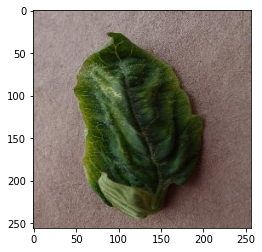

Healthy = 2.8070351743278574%
Bacteria = 19.969121272556347%
Virus = 57.14449109077706%
LateBlight = 20.079352462338736%
The predicted image is : Virus


In [8]:
#Testing

Categories = ['Healthy', 'Bacteria', 'Virus', 'LateBlight']

#Assigning the path of a leaf image that belongs to virus

IMG_PATH = 'C:/Users/hp/Desktop/Project/PlantDiseaseDetection/Dataset/TrainForVGG/v (1).JPG'

img=imread(IMG_PATH)

#Visualizing the image
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)

#Analysing all the probabilities

for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
    
#Finally printing the class that has high probability

print("The predicted image is : "+ Categories[model.predict(l)[0]])

In [13]:
#Train_Report

from sklearn.metrics import classification_report

# predict 
pred = model.predict(x_train)



print(y_train.shape, pred.shape)
print(y_train[:5], pred[:5])


(158,) (158,)
193    2
140    3
147    3
149    3
143    3
Name: Target, dtype: int32 [2 3 3 3 3]


In [14]:
print(classification_report(y_train, pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.97      0.99        40
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        40

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



In [18]:
#Test_Report

from sklearn.metrics import classification_report

# predict
pred = model.predict(x_test)


print(y_test.shape, pred.shape)
print(y_test[:5], pred[:5])


(40,) (40,)
154    2
128    3
175    2
129    3
89     0
Name: Target, dtype: int32 [2 3 2 3 0]


In [19]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.70      0.67        10
           2       0.83      0.50      0.62        10
           3       0.77      1.00      0.87        10

    accuracy                           0.80        40
   macro avg       0.81      0.80      0.79        40
weighted avg       0.81      0.80      0.79        40

